# Comparing histological grade between estrogen-receptor positive and triple-negative breast cancer tumors

This code is in connection with the TFCB Capstone project (homework 8). I am using the raw data from <https://datadryad.org/stash/dataset/doi:10.5061/dryad.32765> to answer a specific question highlighted below.

## Questions for python analysis
### Question 1
Did the severity (histological grade) of the tumor change between the triple-negative (trip_neg) and estrogen-receptor positive (er_pos) tumors?

## About the data (Assumptions)
The excel sheet that I was given was relatively straight-forward with its information. However, there were a few things that I had to make assumptions on. One of those things is the fact that I am still unclear of how they normalized their x, y, and z distance data to form the x, y, z normalized data. Another thing that I would not have understood without looking at their paper, was how the x, y, and z locations were determined. I also assumed that histological grade meant increasing severity as the grade increased and not vice versa for this specific experiment. It would have been easier to use if the authors had added a few more details to the excel spreadsheet or even had a few more materials other than just the raw data. 

## Install/Load packages

Below allows you to load all of the packages necessary for this project.

In [2]:
import pandas as pd

from plotnine import *

## Load file for project

Load the file that contains the information given for this project. In this case, it is a csv file. 

In [4]:
# Created a variable called datafile that has the file that I created from the raw_data file.
datafile = "../edited-data/tumor-location_edited-data_csv.csv"

# Created a dataframe called "data_df" that reads the csv file through pandas.
data_df = pd.read_csv(datafile)

# Printed out only the first few rows of the data_df for reference.
data_df.head()

,id,size_cm,subtype,quadrants,mr_location_ml,mr_location_ap,y_distance,x_norm,y_norm,z_norm,grade,x_distance,z_distance,palpability,histology
0,1,1.5,1,2,2,2,1.7,0.0,0.2,0.2,3,-0.3,2.7,0,2
1,2,3.0,1,2,2,3,0.1,0.0,0.0,0.5,3,-0.4,6.7,1,2
2,3,1.6,1,1,2,2,3.9,0.0,0.4,0.1,3,0.2,1.2,1,2
3,4,1.8,1,5,2,2,3.5,0.0,0.4,0.0,3,-0.3,-0.6,0,2
4,5,3.0,1,1,2,3,0.3,-0.1,0.1,0.0,4,-0.5,0.5,1,2


For this file, I had already tidied the column names and the data beforehand to make it easier to use for analysis in python. For the column names, I removed any spaces and made sure it wasn't case dependent. For the data, I added "NA" to any of the data that did not have size information. However, the rest of the information was present for all the samples. 

## Separate the dataframe into er_pos and trip_neg tumor samples

Currently, the data is mixed between er_pos (denoted with a "1" in the subtype column) and trip_neg (denoted with a "3" in the subtype column). To look at the differences between the two samples, you first must separate them into two different dataframes by their tumor subtype. I created dataframes called "er_pos_df" and "trip_neg_df" which does this.

In [12]:
# Created a new dataframe called "er_pos_df" that only has the rows where the subtype equals one. 
# This marks estrogen-positive samples.
er_pos_df = df[df["subtype"] == 1]

# Printed only the first few rows of the dataframe for reference.
er_pos_df.head()

,id,size_cm,subtype,quadrants,mr_location_ml,mr_location_ap,y_distance,x_norm,y_norm,z_norm,grade,x_distance,z_distance,palpability,histology
0,1,1.5,1,2,2,2,1.7,0.0,0.2,0.2,3,-0.3,2.7,0,2
1,2,3.0,1,2,2,3,0.1,0.0,0.0,0.5,3,-0.4,6.7,1,2
2,3,1.6,1,1,2,2,3.9,0.0,0.4,0.1,3,0.2,1.2,1,2
3,4,1.8,1,5,2,2,3.5,0.0,0.4,0.0,3,-0.3,-0.6,0,2
4,5,3.0,1,1,2,3,0.3,-0.1,0.1,0.0,4,-0.5,0.5,1,2


In [13]:
# Created a new dataframe called "trip_neg_df" that only has the rows where the subtype equals three. 
# This marks triple-negative samples.
trip_neg_df = df[df["subtype"] == 3]

# Printed only the first few rows of the dataframe for reference.
trip_neg_df.head()

,id,size_cm,subtype,quadrants,mr_location_ml,mr_location_ap,y_distance,x_norm,y_norm,z_norm,grade,x_distance,z_distance,palpability,histology
5,6,3.5,3,1,2,2,0.9,0.0,0.1,0.1,3,0.0,1.3,1,3
6,7,2.2,3,2,2,3,1.0,-0.1,0.1,0.3,3,-1.0,3.7,1,3
7,8,2.6,3,2,2,3,1.1,0.0,0.1,0.2,3,-0.4,3.0,1,3
11,12,5.0,3,5,2,1,2.0,-0.1,0.3,0.1,4,-0.6,1.4,0,3
12,13,2.6,3,1,2,2,2.7,0.0,0.3,0.2,3,0.0,2.8,1,3


## Combine the two dataframes back into one dataframe

Now that the dataframes are separated based on their subtype, you can combine the two dataframes back together while changing the subtype labels from numbers to words. This makes it easier to read the data.

In [17]:
# Created a new dataframe called "assigned_df" that combines the two previous dataframes using .append.
# I also renames the data in the subtype column to be either er_pos or trip_neg based on which dataframe it was in.
assigned_df = (er_pos_df.assign(subtype = "er_pos")
    .append(trip_neg_df.assign(subtype = "trip_neg"))
    .reset_index(drop = True))

# Printed the beginning and the end of the dataframe for reference and to show that both dataframes were added.
print(assigned_df.head())

print(assigned_df.tail())

   id  size_cm subtype  quadrants  mr_location_ml  mr_location_ap  y_distance  \
0   1      1.5  er_pos          2               2               2         1.7   
1   2      3.0  er_pos          2               2               3         0.1   
2   3      1.6  er_pos          1               2               2         3.9   
3   4      1.8  er_pos          5               2               2         3.5   
4   5      3.0  er_pos          1               2               3         0.3   

   x_norm  y_norm  z_norm  grade  x_distance  z_distance  palpability  \
0     0.0     0.2     0.2      3        -0.3         2.7            0   
1     0.0     0.0     0.5      3        -0.4         6.7            1   
2     0.0     0.4     0.1      3         0.2         1.2            1   
3     0.0     0.4     0.0      3        -0.3        -0.6            0   
4    -0.1     0.1     0.0      4        -0.5         0.5            1   

   histology  
0          2  
1          2  
2          2  
3          2  

## Graph histology data

To visualize this data, I decided to use a bar graph. This is because I am only comparing the total amount of each histology grade for each subtype. Since I am only comparing one variable, I think that a bar graph best represents this data. 

C:\Users\jazas\anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 11'. Pick better value with 'binwidth'.


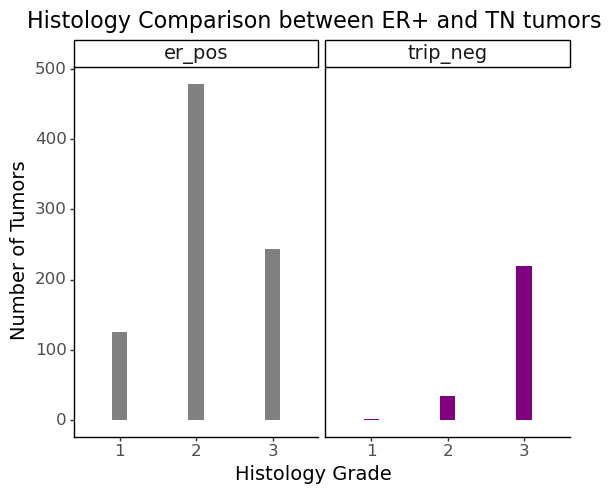

<ggplot: (146984100886)>

In [75]:
# Created a histogram from the "assigned_df" that separates the data by subtype and shows the number of tumors in each 
# histology grade. 
# I also changed the colors of the histogram so that the subtypes had different colors (er_pos = grey and trip_neg = purple).
# Added more accurate labels and a title. 
# I also increased the size of the text to better follow proportional ink guidlines.
# I also changed the scale so that it only showed whole numbers
histology_comparison = (ggplot(assigned_df) + aes("histology", fill = "subtype") + geom_histogram(show_legend = False) 
                        + facet_wrap('~ subtype') + labs(title = "Histology Comparison between ER+ and TN tumors",
                                                         x = "Histology Grade", y = "Number of Tumors") + 
                       theme_classic() + theme(axis_text = element_text(size = 12), axis_title = element_text(size = 14), 
                                              plot_title = element_text(size = 16), strip_text_x = element_text(size = 14)) 
                       + xlim("1", "2", "3") + scale_fill_manual(values = ("grey", "purple")))

histology_comparison

## Conclusions

There appears to be more samples in the estrogen-positive subtype than there are in the triple-negative subtype. However, there does look like there might be some differences between histology grade within these samples. While histology grade 2 tumors are the most abundant in the estrogen-positive tumors, histology grade 3 tumors are more abundant in the triple-negative tumors. That hints at the possibility that while triple-negative tumors are generally more rare, they seem to be more severe when they do occur. 